In [29]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [30]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [31]:
X_train.shape

(60000, 28, 28)

In [32]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

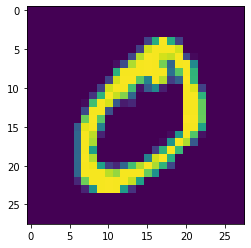

In [33]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [34]:
# Converting X_train and X_test to get values between 0 and 1 values
X_train = X_train/255
X_test = X_test/255

In [35]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [36]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))

model.add(Dense(32, activation='relu'))

# 10 nodes in Output layer because there are 10 classes 
model.add(Dense(10, activation='softmax'))


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics='accuracy')

In [39]:
from tensorflow.python import metrics
history = model.fit(X_train, y_train, epochs = 20, validation_split=0.2)
history

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2884 - accuracy: 0.9157 - val_loss: 0.1415 - val_accuracy: 0.9568
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1169 - accuracy: 0.9650 - val_loss: 0.1032 - val_accuracy: 0.9683
Epoch 3/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0810 - accuracy: 0.9751 - val_loss: 0.1142 - val_accuracy: 0.9654
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0632 - accuracy: 0.9805 - val_loss: 0.0932 - val_accuracy: 0.9732
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.1088 - val_accuracy: 0.9681
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.1009 - val_accuracy: 0.9728
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0325 - accuracy: 0.9892 - val_loss: 0.1105 - val_accuracy

In [40]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [41]:
y_pred = y_prob.argmax(axis=1)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9771

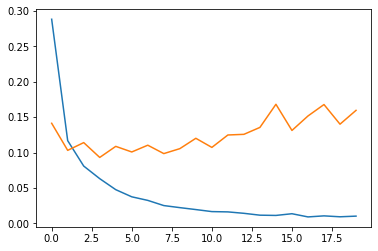

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

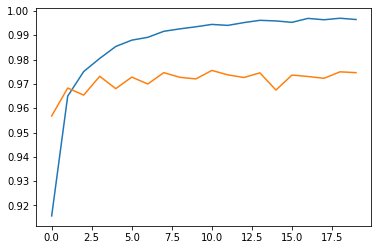

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

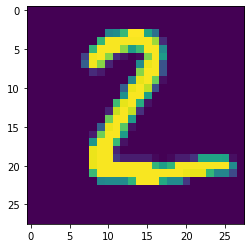

In [45]:
plt.imshow(X_test[1])

In [46]:
model.predict(X_test[1].reshape(1, 28, 28)).argmax(axis=1)

1/1 [==============================] - 0s 17ms/step


array([2])